In [81]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import accuracy_score

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
print(X_test.shape)
print(y_train)

(10000, 28, 28)
[5 0 4 ... 5 6 8]


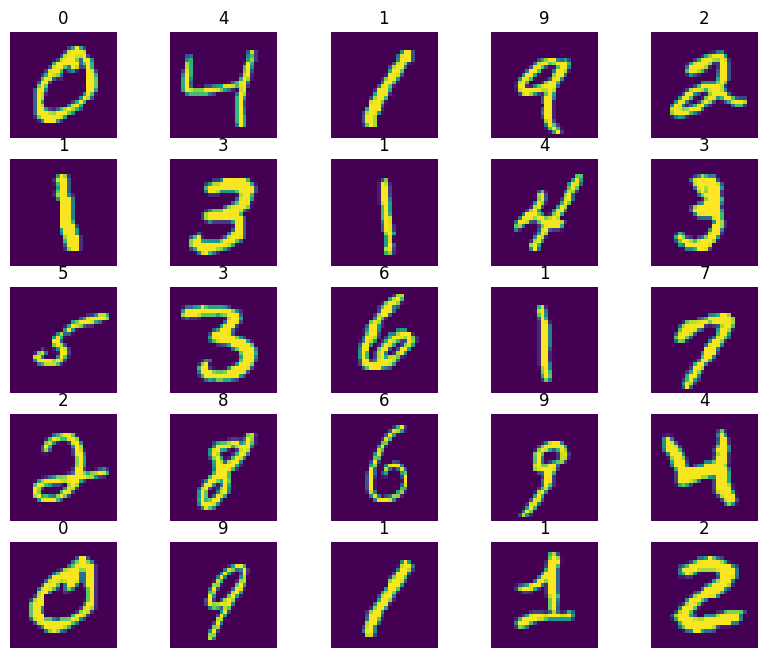

In [18]:
num = 26
imgs = X_train[:num]
lbls = y_train[:num]
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    plt.title(lbls[i])
    plt.axis("off")
    plt.imshow(imgs[i])
plt.show()

In [19]:
X_train = X_train/255
X_test = X_test/255

In [24]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [27]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5116 - loss: 1.5210 - val_accuracy: 0.8547 - val_loss: 0.5077
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8582 - loss: 0.4873 - val_accuracy: 0.8939 - val_loss: 0.3734
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8891 - loss: 0.3763 - val_accuracy: 0.9078 - val_loss: 0.3225
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9013 - loss: 0.3399 - val_accuracy: 0.9105 - val_loss: 0.3041
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9081 - loss: 0.3121 - val_accuracy: 0.9190 - val_loss: 0.2816
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9137 - loss: 0.2914 - val_accuracy: 0.9248 - val_loss: 0.2686
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9252 - loss: 0.2666 - val_accuracy: 0.9289 - val_loss: 0.2491
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9288 - loss: 0.2474 - 

In [28]:
prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [29]:
y_pred = prob.argmax(axis=1)

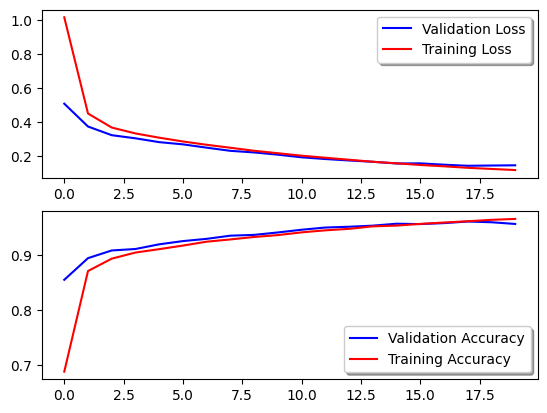

In [78]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['val_loss'], color='b', label="Validation Loss")
ax[0].plot(history.history['loss'], color='r', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['val_accuracy'], color='b', label="Validation Accuracy")
ax[1].plot(history.history['accuracy'], color='r',label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [56]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([2])

In [64]:
print("my path is ", os.getcwd())
test=pd.read_csv(os.getcwd() + '/data/test.csv')
test_values = test.values

my path is  /home/teteu/projects/deep/Jupyter/MNIST


In [69]:
test_reshaped = test_values.reshape(28000, 28, 28)
test_output = model.predict(test_reshaped)
test_reshaped.shape

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(28000, 28, 28)

In [71]:
y_output =test_out.argmax(axis=1)

In [72]:
submission = pd.DataFrame(y_output, columns=['Label'])
submission.index.name = 'ImageId'
submission.index += 1
submission.to_csv(os.getcwd() + '/data/submission.csv')